# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'>웹 스크레이핑을 위한 기본 지식 </font>

### 웹사이트에서 순위 데이터 가져오기


In [1]:
import os
from os.path import exists

import requests  
from bs4 import BeautifulSoup 

#### <font color='#0000CC'>웹 사이트 순위 : Alexa - Top Sites in South Korea</font>

In [2]:
url = "https://www.alexa.com/topsites/countries/KR"

html = requests.get(url).text
soup = BeautifulSoup(html, "lxml")
soup.title

<title>End of Service Notice</title>

In [3]:
# p 태그의 요소 안에서 a 태그의 요소를 찾음
website_ranking = soup.select('p a')
len(website_ranking)

0

In [4]:
top_sites = soup.find_all('div')
len(top_sites)

9

<div>
<div>
<header id="alx-header">
<div>
<section class="alexa-logo" id="alexa-logo">

</section>
</div>
</header>
<section id="alx-content">
<div style="min-height:500px;">
<div class="EndofLife">
<h3>End of Service Notice</h3>
<span>We retired Alexa.com on May 1, 2022, after more than two decades of helping you find, reach, and convert your digital audience.  Thank you for making us your go-to resource for content research, competitive analysis, keyword research, and so much more.</span>
<br/>
<br/>
</div>
</div>
</section>
</div>
</div>
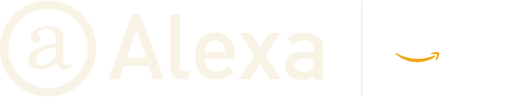

In [5]:
top_sites[0]

In [6]:
top_sites = soup.find_all('div', 'tr site-listing')
len(top_sites)

0

In [7]:
tmp = top_sites[0]
tmp

IndexError: list index out of range

In [8]:
tmp1 = tmp.find('div', 'td')
tmp1

NameError: name 'tmp' is not defined

In [9]:
tmp2 = tmp.find('a')
tmp2

NameError: name 'tmp' is not defined

In [10]:
rank = tmp1.get_text()
rank

NameError: name 'tmp1' is not defined

In [11]:
site = tmp2.get_text()
site

NameError: name 'tmp2' is not defined

In [12]:
link = tmp2['href']
link

NameError: name 'tmp2' is not defined

In [13]:
Rank = []
Site = []
Link = []

url = "https://www.alexa.com/topsites/countries/KR"

html = requests.get(url).text
soup = BeautifulSoup(html, "lxml")
top_sites = soup.find_all('div', 'tr site-listing')

print("[Top Sites in South Korea]")
print("="*80)
for idx in range(len(top_sites)):
    tmp  = top_sites[idx]
    
    tmp1 = tmp.find('div', 'td')
    tmp2 = tmp.find('a')
    rank = tmp1.get_text()
    site = tmp2.get_text()
    link = tmp2['href']
    link = 'https://www.alexa.com' + link
    
    if idx%10==0 and idx>0:
        print("-"*80)
        
    print("{rank}위. {site} {link}".format(
        rank = ' '*(3-len(rank)) + rank, 
        site = site, 
        link = ' '*(20-len(site)) + link
    ))
    
    Rank.append(rank)
    Site.append(site)
    Link.append(link)


[Top Sites in South Korea]


In [14]:
Rank[:5]

[]

In [15]:
Site[:5]

[]

In [16]:
Link[:5]

[]

In [17]:
import pandas as pd

data = {'Rank':Rank, 'Site':Site, 'Link':Link}
df = pd.DataFrame(data)

In [18]:
df.head()

,Rank,Site,Link


In [19]:
df.set_index('Rank', inplace=True)
df.head()

,Site,Link
Rank,,


In [20]:
dir_data = 'data'
if not exists(dir_data):
    os.mkdir(dir_data)

In [21]:
df.to_csv('./data/top_sites_SKorea_201909.csv')

In [22]:
!type .\data\top_sites_SKorea_201909.csv

Rank,Site,Link


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>